Using my notes on theory from Andrew Ng's ML Specialization course, I'm going to see if I can create a model that predicts an output from infinite possible outputs using a training dataset, a model y=wx+b and the cost function J(w,b)

In [46]:
import numpy as np
import matplotlib.pyplot as plt

#dataset
features = np.array([1, 2, 3, 4, 5, 6])
targets = np.array([50, 500, 6000, 70000, 400000, 600000])
m = len(features)

#normalizing features for better convergence (wasn't converging when I tried features that had a large range - this can cause the gradient descent to bounce back and forth on the oval-shaped contour plot, and overshoot the optimum)
features_min = features.min()
features_max = features.max()
features_normalized = (features - features_min) / (features_max - features_min)
#now the features are rescaled

#define the parameters and give them a starting value
w = 0.0 #weight
b = 0.0 #bias

#the model or hypothesis
f_wb = b*(1+w) ** features_normalized 

#cost fxn
cost = 1/(2*m) * np.sum((f_wb - targets) ** 2)
# Track cost plot for visualization
cost_history = []

##gradient descent algorithm to find the best w and b 

a = 0.001 #learning rate alpha

#define partial derivatives 
dJw = 1/m * np.sum(f_wb - targets)*features_normalized
dJb = 1/m * np.sum(f_wb - targets)

#algorithm to minimize w and b
#w = w - a*dJw
#b = b - a*dJb
e= 2.718281
#put it all together
for i in range(100000):
    f_wb = b*(1+w) ** features_normalized #compute predicted value at a given w and b
    
    cost = 1/(2*m) * np.sum((f_wb - targets) ** 2) #compute cost of that value
    cost_history.append(cost)  # Track the cost

    #calculate derivatives for w and b
    dJw = 1/m * np.sum((f_wb - targets)*features_normalized)
    dJb = 1/m * np.sum(f_wb - targets)

    #update parameters w and b (temp_ is so we don't update w and then b, need to simultaneously update)
    temp_w = w - a*dJw
    temp_b = b - a*dJb
    w = temp_w
    b = temp_b

#output final parameters w and b
print(f"the weight is {w} and the bias is {b}")


the weight is 198.41888873008432 and the bias is 3532.5402969120923


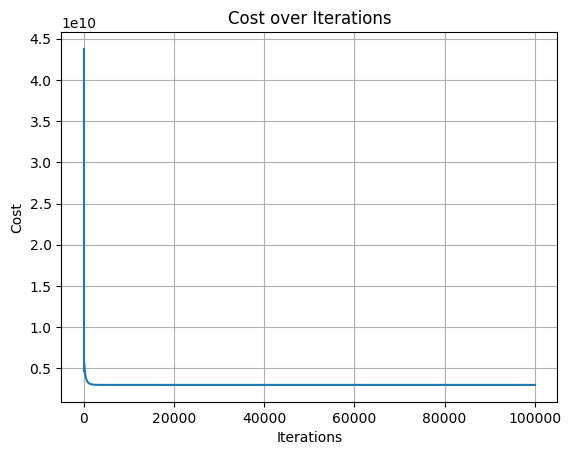

In [47]:
#Visualize the cost over iterations to see convergence
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.grid()
plt.show()


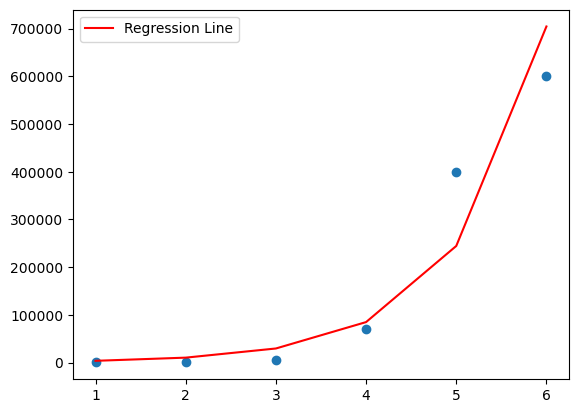

In [48]:
#Visualize the dataset 
plt.scatter(features, targets)

#visualize the regression line
plt.plot(features, f_wb, color='red', label='Regression Line')
plt.legend()